## Adult Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

%matplotlib inline
sea.set()   

In [159]:
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [214]:
adu_df = pd.read_csv(url_data, header=None, names=['Age', 'WorkClass', 'Final Weight', 'Education', 'Education-Num',
                                                   'Marital_Status', 'Occupation', 'Relationship', 'Race',
                                                   'Sex', 'Capital-Gain', 'Capital-Loss', 'Hours/Week',
                                                   'Native Country', 'GI'])

In [10]:
adu_df.head()

,Age,WorkClass,Final Weight,Education,Education-Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours/Week,Native Country,GI
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
adu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
WorkClass         32561 non-null object
Final Weight      32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Marital_Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital-Gain      32561 non-null int64
Capital-Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native Country    32561 non-null object
GI                32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
adu_df.describe()

,Age,Final Weight,Education-Num,Capital-Gain,Capital-Loss,Hours/Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# Checking for Missing Values...
adu_df.isnull().sum()

Age               0
WorkClass         0
Final Weight      0
Education         0
Education-Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours/Week        0
Native Country    0
GI                0
dtype: int64

In [14]:
#We can conclude that NO MISSING VALUES...We proceed further

### Exploratory Data Analysis (Data Visualization)

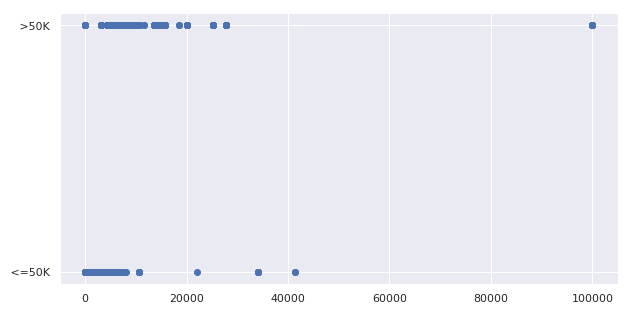

In [24]:
#Capital-Gain vs Gross Income
plt.figure(figsize=(10,5))
plt.scatter('Capital-Gain', 'GI', data=adu_df)

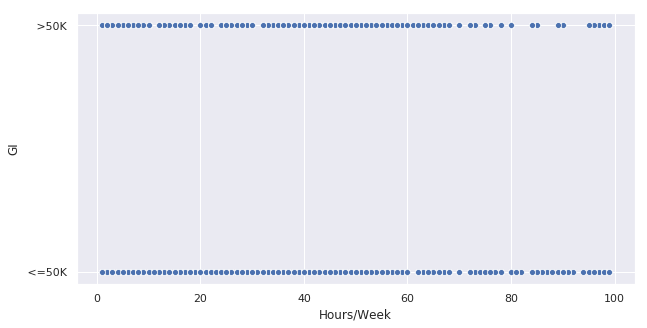

In [77]:
#Hours/Week vs Gross Income
plt.figure(figsize=(10,5))
sea.scatterplot('Hours/Week', 'GI', data=adu_df)

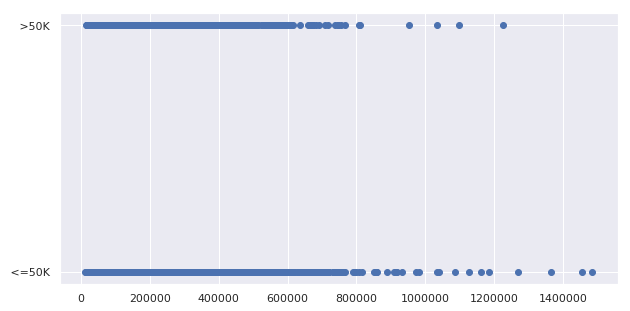

In [22]:
# Final-Weight vs GI
plt.figure(figsize=(10,5))
plt.scatter('Final Weight', 'GI', data=adu_df)

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

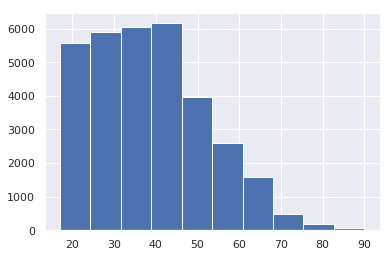

In [33]:
#Age vs GI
plt.hist(adu_df['Age'])
# sea.scatterplot('Age', 'GI', data=adu_df)

In [35]:
adu_df.columns

Index(['Age', 'WorkClass', 'Final Weight', 'Education', 'Education-Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-Gain', 'Capital-Loss', 'Hours/Week', 'Native Country', 'GI'],
      dtype='object')

## Converting Categorical to Numerical

In [42]:
# I'm considering some features as important...

In [43]:
#Age,Workclass, Education, Marital-Status, Occupation,Capital-Gain, Hours/Week

In [215]:
adu_df['WorkClass'].unique()
#Converting WorkClass...
adu_df['WorkClass'] = adu_df['WorkClass'].map({' State-gov':0,  ' Self-emp-not-inc':1, ' Private':2, ' Federal-gov':3,' Local-gov':4, ' ?':5, ' Self-emp-inc':6, ' Without-pay':7, ' Never-worked':8})



In [216]:
adu_df['WorkClass'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [217]:
#Converting GI to Numerical format
# adu_df['GI'].unique()
adu_df['GI'] = adu_df['GI'].map({' <=50K':0, ' >50K':1})

In [220]:
adu_df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [221]:
#Converting Education
adu_df['Education'] = adu_df['Education'].map({' Bachelors':0, ' HS-grad':1, ' 11th':2, ' Masters':3,
                                              ' 9th':4, ' Some-college':5, ' Assoc-acdm':6, ' Assoc-voc':7,  ' 7th-8th':8, 
                                              ' Doctorate':9, ' Prof-school':10, ' 5th-6th':11, 
                                              ' 10th':12, ' 1st-4th':13, ' Preschool':14, ' 12th':15})

In [222]:
#Converting Marital_Status
adu_df['Marital_Status'] = adu_df['Marital_Status'].map({' Never-married':0 , ' Married-civ-spouse':1, ' Divorced':2, ' Married-spouse-absent':3, ' Separated':4, ' Married-AF-spouse':5,' Widowed':6})

In [223]:
adu_df['Occupation'] = adu_df['Occupation'].map({' Adm-clerical':0 , ' Exec-managerial':1, ' Handlers-cleaners':2,
       ' Prof-specialty':3, ' Other-service':4 , ' Sales':5 , ' Craft-repair':6 ,
       ' Transport-moving':7, ' Farming-fishing':8, ' Machine-op-inspct':9,
       ' Tech-support':10, ' ?':11, ' Protective-serv':12, ' Armed-Forces':13,
       ' Priv-house-serv':14})

In [225]:
#Removing unnecessary columns...
#Native Country, Relationship, Race
adu_df.drop(['Relationship', 'Race', 'Native Country'], axis=1, inplace=True)



# plt.figure(figsize=(13,4))
# sea.scatterplot('Native Country', 'GI', data=adu_df)

In [227]:
#Converting Sex Column...

adu_df['Sex'] = adu_df['Sex'].map({' Male':0 , ' Female':1})

In [230]:
adu_df.drop(['Education-Num','Capital-Loss','Occupation'],axis=1, inplace=True)

In [231]:
adu_df.head()

,Age,WorkClass,Final Weight,Education,Marital_Status,Sex,Capital-Gain,Hours/Week,GI
0,39,0,77516,0,0,0,2174,40,0
1,50,1,83311,0,1,0,0,13,0
2,38,2,215646,1,2,0,0,40,0
3,53,2,234721,2,1,0,0,40,0
4,28,2,338409,0,1,1,0,40,0


In [233]:
adu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
Age               32561 non-null int64
WorkClass         32561 non-null int64
Final Weight      32561 non-null int64
Education         32561 non-null int64
Marital_Status    32561 non-null int64
Sex               32561 non-null int64
Capital-Gain      32561 non-null int64
Hours/Week        32561 non-null int64
GI                32561 non-null int64
dtypes: int64(9)
memory usage: 2.2 MB


In [116]:
#Checking Education Column
edu = adu_df.groupby('Education')
edu.mean()

,Age,WorkClass,Final Weight,Education-Num,Capital-Gain,Capital-Loss,Hours/Week,GI
Education,,,,,,,,
10th,37.429796,2.389068,196832.465166,6.0,404.574491,56.845659,37.052519,0.066452
11th,32.355745,2.348085,194928.077447,7.0,215.097872,50.079149,33.925957,0.051064
12th,32.000000,2.351039,199097.508083,8.0,284.087760,32.337182,35.780600,0.076212
1st-4th,46.142857,2.220238,239303.000000,2.0,125.875000,48.327381,38.255952,0.035714
5th-6th,42.885886,2.294294,232448.333333,3.0,176.021021,68.252252,38.897898,0.048048
7th-8th,48.445820,2.351393,188079.171827,4.0,233.939628,65.668731,39.366873,0.061920
9th,41.060311,2.381323,202485.066148,5.0,342.089494,28.998054,38.044747,0.052529
Assoc-acdm,37.381443,2.341143,193424.093721,12.0,640.399250,93.418932,40.504217,0.248360
Assoc-voc,38.553546,2.249638,181936.016643,11.0,715.051375,72.754703,41.610709,0.261216


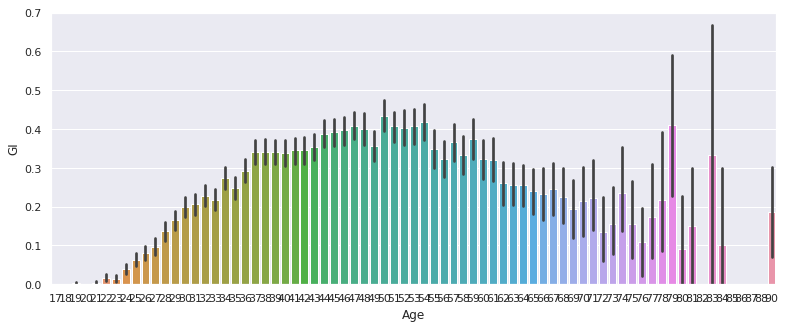

In [89]:
plt.figure(figsize=(13,5))
sea.barplot('Age','GI', data=adu_df)

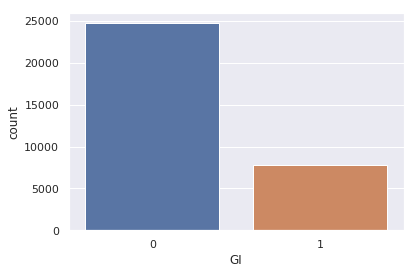

In [93]:
sea.countplot('GI',data=adu_df)

In [114]:
#Ages...
# adu_df['Age']
age_17_40 = adu_df[(adu_df['Age']>=17) & (adu_df['Age']<=40)]
age_40_90 = adu_df[(adu_df['Age']>40) & (adu_df['Age']<=90)]

TypeError: Could not convert  <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K to numeric

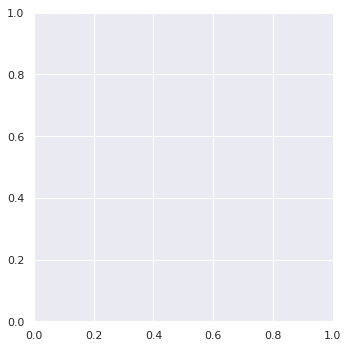

In [41]:
# x=sea.FacetGrid(adu_df, row='WorkClass')
# x=x.map(plt.hist, )
# sea.lmplot(x='WorkClass', y='GI', data=adu_df)

## Taking Features

In [234]:
adu_df.head()

,Age,WorkClass,Final Weight,Education,Marital_Status,Sex,Capital-Gain,Hours/Week,GI
0,39,0,77516,0,0,0,2174,40,0
1,50,1,83311,0,1,0,0,13,0
2,38,2,215646,1,2,0,0,40,0
3,53,2,234721,2,1,0,0,40,0
4,28,2,338409,0,1,1,0,40,0


In [236]:
x = adu_df.drop('GI',axis=1)

In [237]:
y = adu_df['GI']

In [240]:
from sklearn.model_selection import train_test_split

In [256]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 32)

In [244]:
x_train.shape

(26048, 8)

In [247]:
x_test.shape

(6513, 8)

## Building Model

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.

In [257]:
lr = LogisticRegression()

In [258]:
lr.fit(x,y)

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [259]:
predictions = lr.predict(x_test)

In [260]:
from sklearn.metrics import classification_report, accuracy_score

In [261]:
print("Classification Report:\n",classification_report(predictions,y_test))
print("Accuracy Score:\n",accuracy_score(predictions,y_test)*100)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      6107
           1       0.21      0.79      0.33       406

   micro avg       0.80      0.80      0.80      6513
   macro avg       0.60      0.80      0.61      6513
weighted avg       0.94      0.80      0.85      6513

Accuracy Score:
 80.25487486565332
